In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
df_raw = pd.read_excel("data/raw/bmkg_raw.xlsx", sheet_name="Sheet1")

In [3]:
df_raw.info()
print("Shape:", df_raw.shape)
print("Columns:", list(df_raw.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  5479 non-null   datetime64[ns]
 1   TN       5324 non-null   object        
 2   TX       5324 non-null   object        
 3   TAVG     5324 non-null   object        
 4   RH_AVG   5324 non-null   object        
 5   RR       5324 non-null   object        
 6   SS       5324 non-null   object        
 7   FF_X     5324 non-null   object        
 8   DDD_X    5324 non-null   object        
 9   FF_AVG   5324 non-null   object        
 10  DDD_CAR  5324 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 471.0+ KB
Shape: (5479, 11)
Columns: ['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR']


In [4]:
duplicated = df_raw.duplicated().sum()
print(f"There are {duplicated} duplicated records")

There are 0 duplicated records


In [5]:
df_raw.replace([8888, 9999, '-', ''], np.nan, inplace=True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_10832\3196771752.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw.replace([8888, 9999, '-', ''], np.nan, inplace=True)


In [7]:
missing_summary = (
    df_raw.isna()
      .agg(['sum'])
      .T
      .rename(columns={'sum': 'Missing'})
)
missing_summary["Percentage"] = (missing_summary["Missing"] / len(df_raw) * 100).round(2)
missing_summary.sort_values("Missing", ascending=False, inplace=True)
display(missing_summary.head(10))

,Missing,Percentage
TAVG,3309,60.39
RH_AVG,3300,60.23
RR,1776,32.41
SS,291,5.31
TN,278,5.07
TX,273,4.98
FF_AVG,187,3.41
DDD_X,185,3.38
FF_X,185,3.38
DDD_CAR,185,3.38


In [9]:
df_raw.to_excel("data/processed/bmkg_clean.xlsx", index=False)
print("Saved clean dataset.")

Saved clean dataset.


In [10]:
df_clean = pd.read_excel("data/processed/bmkg_clean.xlsx", sheet_name="Sheet1")

In [11]:
#Menampilkan ukuran data
#Jumlah baris
print('Jumlah sampel = ', df_clean.shape[0])
#Jumlah kolom
print('Jumlah variabel (kolom) = ', df_clean.shape[1])

Jumlah sampel =  5479
Jumlah variabel (kolom) =  11


In [12]:
#Mencetak nama kolom
nama_kolom = df_clean.columns
nama_kolom

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR'],
      dtype='object')

In [13]:
#Mencetak 5 baris pertama
df_clean.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,24.2,31.0,26.3,92.0,2.2,4.8,3.0,270.0,2.0,E
1,2010-01-02,24.4,NaN,25.7,94.0,2.2,3.9,4.0,135.0,2.0,NW
2,2010-01-03,24.2,31.4,26.9,86.0,19.6,4.2,3.0,360.0,2.0,N
3,2010-01-04,24.8,30.6,26.7,91.0,NaN,1.1,4.0,270.0,2.0,N
4,2010-01-05,24.0,NaN,25.7,92.0,23.4,0.0,5.0,270.0,3.0,NE


In [14]:
#Mencetak 5 baris terakhir
df_clean.tail()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
5474,2024-12-27,23.8,29.8,NaN,NaN,0.5,3.5,3.0,240.0,2.0,SW
5475,2024-12-28,24.8,31.4,NaN,NaN,NaN,1.4,4.0,310.0,2.0,S
5476,2024-12-29,23.4,31.8,NaN,NaN,30.3,1.3,3.0,220.0,2.0,SW
5477,2024-12-30,23.9,32.6,NaN,NaN,16.3,6.8,3.0,230.0,2.0,SW
5478,2024-12-31,24.0,31.4,NaN,NaN,10.0,7.1,4.0,230.0,2.0,SW


In [15]:
#Menampilkan deskripsi statistika (nilai rata-rata, standar deviasi, nilai minimum, dan kuartil)
D = df_clean.describe()
D

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG
count,5479,5201.000000,5206.000000,2170.000000,2179.000000,3703.000000,5188.000000,5294.000000,5294.000000,5292.00000
mean,2017-07-01 23:59:59.999999744,23.718977,32.086035,27.024747,83.439192,10.904915,4.563994,3.576124,187.194749,1.68254
min,2010-01-01 00:00:00,19.000000,23.800000,23.300000,54.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2013-10-01 12:00:00,23.100000,31.000000,26.100000,79.000000,0.000000,2.200000,3.000000,90.000000,1.00000
50%,2017-07-02 00:00:00,23.800000,32.200000,26.900000,84.000000,3.200000,4.700000,3.000000,180.000000,2.00000
75%,2021-04-01 12:00:00,24.400000,33.400000,27.700000,88.000000,14.000000,6.800000,4.000000,270.000000,2.00000
max,2024-12-31 00:00:00,27.000000,37.600000,33.200000,100.000000,255.300000,11.100000,21.000000,360.000000,5.00000
std,NaN,1.031173,1.876307,1.413950,6.939946,18.088620,2.835594,1.310973,99.576388,0.70109


In [16]:
#Menemukan kapan TN mencapai nilai tertinggi
df_clean[df_clean['TN']==27]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
4630,2022-09-05,27.0,36.4,30.8,75.0,NaN,NaN,3.0,100.0,1.0,N


In [17]:
#Menemukan kapan TX mencapai nilai tertinggi
df_clean[df_clean['TX']==37.6]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
2060,2015-08-23,21.2,37.6,NaN,NaN,NaN,7.2,5.0,50.0,3.0,E


In [18]:
#Menemukan kapan TAVG mencapai nilai tertinggi
df_clean[df_clean['TAVG']==33.2]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
5050,2023-10-30,23.4,36.8,33.2,54.0,NaN,9.1,4.0,180.0,2.0,NE


In [19]:
#Menemukan kapan RH_AVG mencapai nilai tertinggi
df_clean[df_clean['RH_AVG']==100]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
163,2010-06-13,23.9,31.1,25.9,100.0,0.5,1.2,4.0,180.0,1.0,N


In [20]:
#Menemukan kapan RR mencapai nilai tertinggi
df_clean[df_clean['RR']==255.3]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
4031,2021-01-14,23.1,26.3,NaN,NaN,255.3,0.0,3.0,240.0,1.0,SW


In [21]:
#Menemukan kapan SS mencapai nilai tertinggi
df_clean[df_clean['SS']==11.1]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
3515,2019-08-17,22.0,33.7,NaN,NaN,NaN,11.1,5.0,110.0,2.0,SE


In [22]:
#Menemukan kapan FF_X mencapai nilai tertinggi
df_clean[df_clean['FF_X']==21]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
3201,2018-10-07,24.6,35.7,NaN,NaN,NaN,1.0,21.0,40.0,4.0,E
3255,2018-11-30,24.6,32.7,NaN,NaN,NaN,4.4,21.0,290.0,3.0,SW
5274,2024-06-10,24.9,34.0,29.7,77.0,NaN,8.6,21.0,250.0,3.0,E


In [23]:
#Menemukan kapan DD_X mencapai nilai tertinggi
df_clean[df_clean['DDD_X']==360]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
2,2010-01-03,24.2,31.4,26.9,86.0,19.6,4.2,3.0,360.0,2.0,N
5,2010-01-06,23.5,30.6,26.4,87.0,35.2,1.0,3.0,360.0,2.0,N
7,2010-01-08,23.2,31.5,25.2,91.0,17.4,0.8,4.0,360.0,2.0,E
22,2010-01-23,23.2,30.8,25.9,88.0,33.0,1.9,4.0,360.0,2.0,NE
24,2010-01-25,24.8,28.8,25.3,90.0,0.8,0.0,3.0,360.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...
5173,2024-03-01,24.2,29.4,26.4,92.0,46.2,7.2,3.0,360.0,1.0,N
5178,2024-03-06,24.4,31.8,28.7,83.0,42.3,8.3,6.0,360.0,2.0,N
5206,2024-04-03,25.5,34.9,31.1,74.0,0.0,9.9,3.0,360.0,2.0,N
5214,2024-04-11,24.4,33.8,30.7,71.0,0.8,0.3,3.0,360.0,2.0,NE


In [24]:
#Menemukan kapan FF_AVG mencapai nilai tertinggi
df_clean[df_clean['FF_AVG']==5]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
575,2011-07-30,21.7,32.0,26.2,76.0,NaN,7.8,6.0,90.0,5.0,E
1341,2013-09-03,23.4,31.8,26.9,80.0,4.1,7.9,5.0,90.0,5.0,E


In [25]:
var = 'TN'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'TX'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'TAVG'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'RH_AVG'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'RR'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'SS'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'FF_X'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'DDD_X'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

var = 'FF_AVG'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar',var_max, 'pada tanggal', df_clean[df_clean[var]==var_max]['TANGGAL'].values[0])

TN mencapai nilai tertinggi sebesar 27.0 pada tanggal 2022-09-05T00:00:00.000000000
TX mencapai nilai tertinggi sebesar 37.6 pada tanggal 2015-08-23T00:00:00.000000000
TAVG mencapai nilai tertinggi sebesar 33.2 pada tanggal 2023-10-30T00:00:00.000000000
RH_AVG mencapai nilai tertinggi sebesar 100.0 pada tanggal 2010-06-13T00:00:00.000000000
RR mencapai nilai tertinggi sebesar 255.3 pada tanggal 2021-01-14T00:00:00.000000000
SS mencapai nilai tertinggi sebesar 11.1 pada tanggal 2019-08-17T00:00:00.000000000
FF_X mencapai nilai tertinggi sebesar 21.0 pada tanggal 2018-10-07T00:00:00.000000000
DDD_X mencapai nilai tertinggi sebesar 360.0 pada tanggal 2010-01-03T00:00:00.000000000
FF_AVG mencapai nilai tertinggi sebesar 5.0 pada tanggal 2011-07-30T00:00:00.000000000


In [26]:
#Menambahkan kolom Tahun, Bulan dan Hari pda data frame yang diekstraksi dari kolom Tanggal
df_clean['Tahun'] = pd.DatetimeIndex(df_clean['TANGGAL']).year
df_clean['Bulan'] = pd.DatetimeIndex(df_clean['TANGGAL']).month
df_clean['Hari'] = df_clean['TANGGAL'].dt.day_name()

In [27]:
df_clean.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,Tahun,Bulan,Hari
0,2010-01-01,24.2,31.0,26.3,92.0,2.2,4.8,3.0,270.0,2.0,E,2010,1,Friday
1,2010-01-02,24.4,NaN,25.7,94.0,2.2,3.9,4.0,135.0,2.0,NW,2010,1,Saturday
2,2010-01-03,24.2,31.4,26.9,86.0,19.6,4.2,3.0,360.0,2.0,N,2010,1,Sunday
3,2010-01-04,24.8,30.6,26.7,91.0,NaN,1.1,4.0,270.0,2.0,N,2010,1,Monday
4,2010-01-05,24.0,NaN,25.7,92.0,23.4,0.0,5.0,270.0,3.0,NE,2010,1,Tuesday


In [28]:
#Menampilkan nilai unik dari kolom Tahun
df_clean['Tahun'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int32)

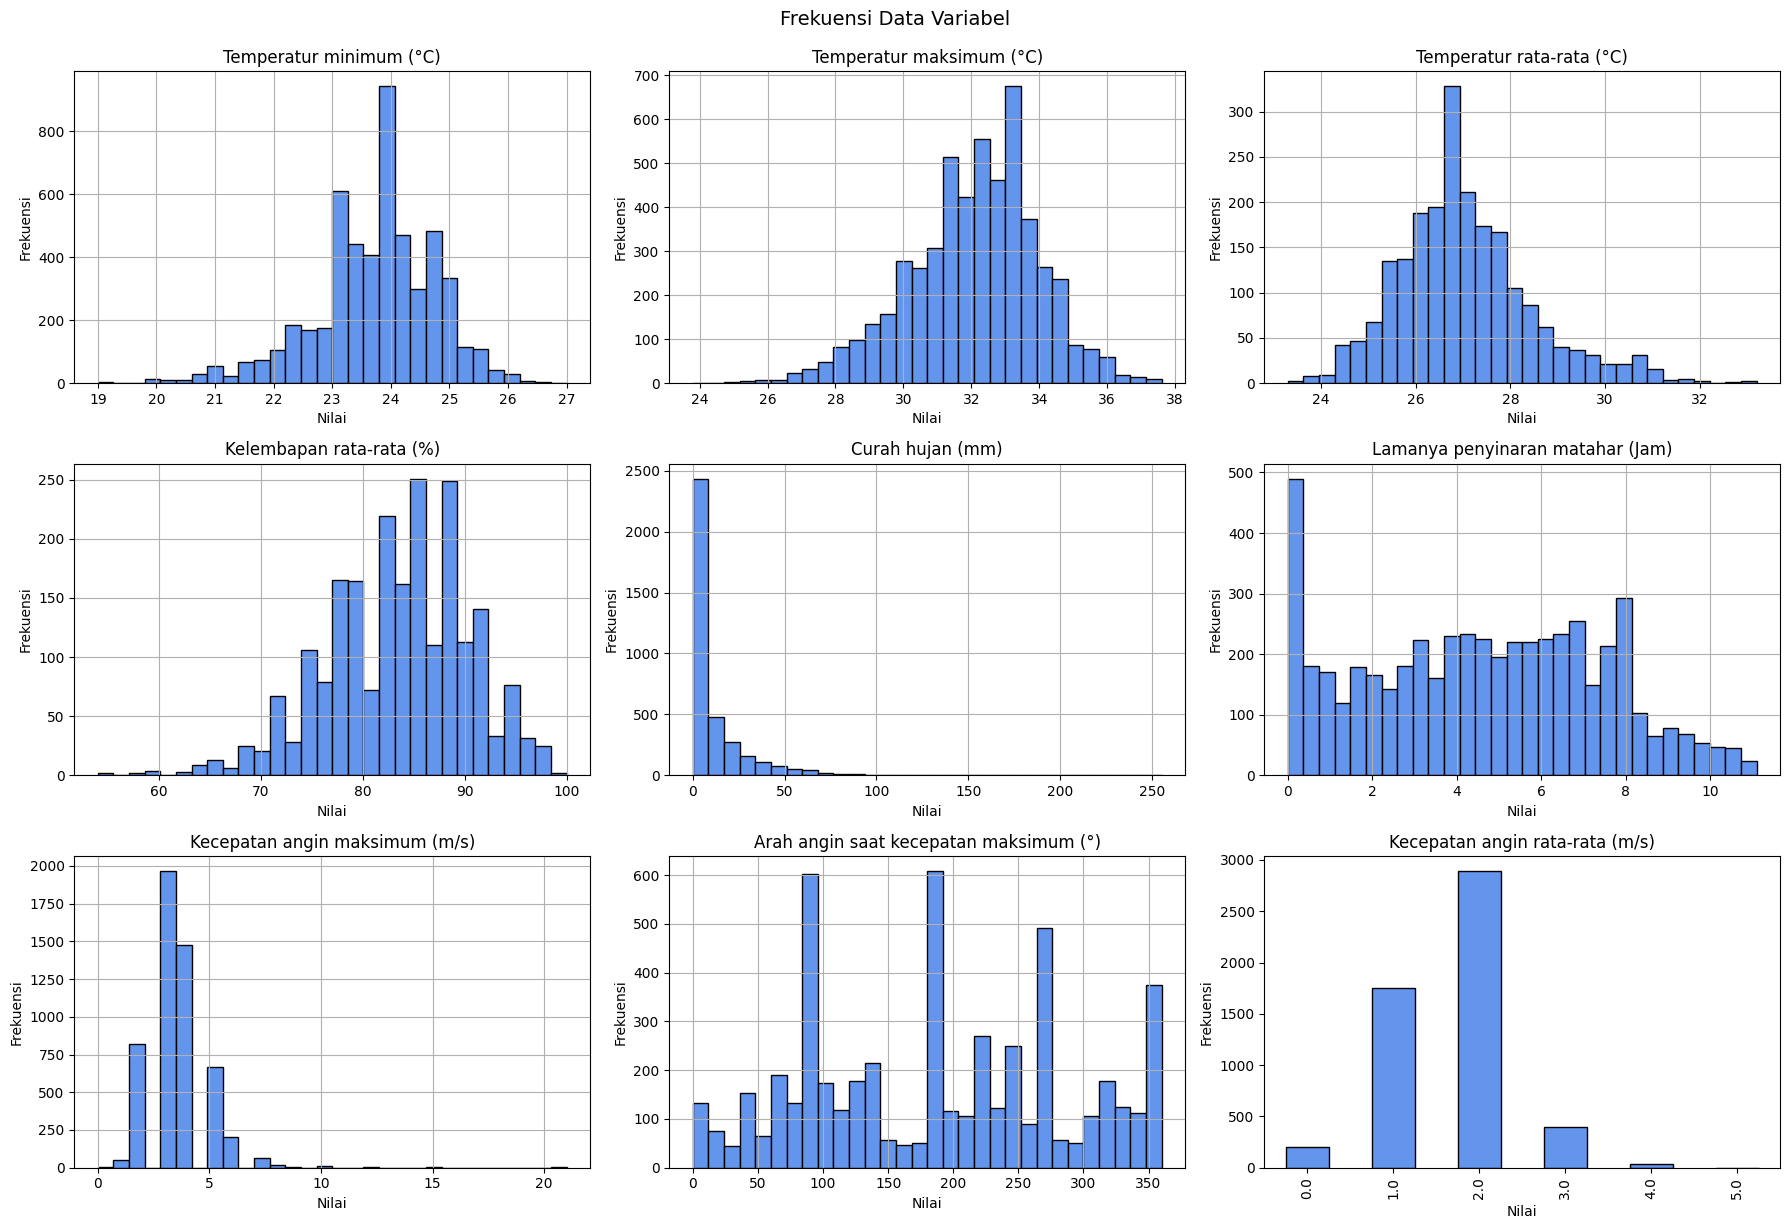

In [29]:
kolom_ada = df_clean.columns  # semua kolom di DataFrame
variables = [
    ('TN', 'Temperatur minimum (°C)'),
    ('TX', 'Temperatur maksimum (°C)'),
    ('TAVG', 'Temperatur rata-rata (°C)'),
    ('RH_AVG', 'Kelembapan rata-rata (%)'),
    ('RR', 'Curah hujan (mm)'),
    ('SS', 'Lamanya penyinaran matahar (Jam)'),
    ('FF_X', 'Kecepatan angin maksimum (m/s)'),
    ('DDD_X', 'Arah angin saat kecepatan maksimum (°)'),
    ('FF_AVG', 'Kecepatan angin rata-rata (m/s)'),
]

# Filter variabel yang ada di dataset
variables = [v for v in variables if v[0] in kolom_ada]

# Buat subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, (var, title) in enumerate(variables):
    ax = axs[i]
    if df_clean[var].dtype == 'object' or df_clean[var].nunique() < 15:
        # Kategorikal (misalnya arah angin: N, S, E, W, dsb.)
        df_clean[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
    else:
        # Numerik
        df_clean[var].hist(bins=30, ax=ax, color='cornflowerblue', edgecolor='black')

    ax.set_title(title)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

# Kosongkan subplot jika jumlah variabel < 9
for j in range(len(variables), 9):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Frekuensi Data Variabel", y=1.02, fontsize=14)
plt.show()

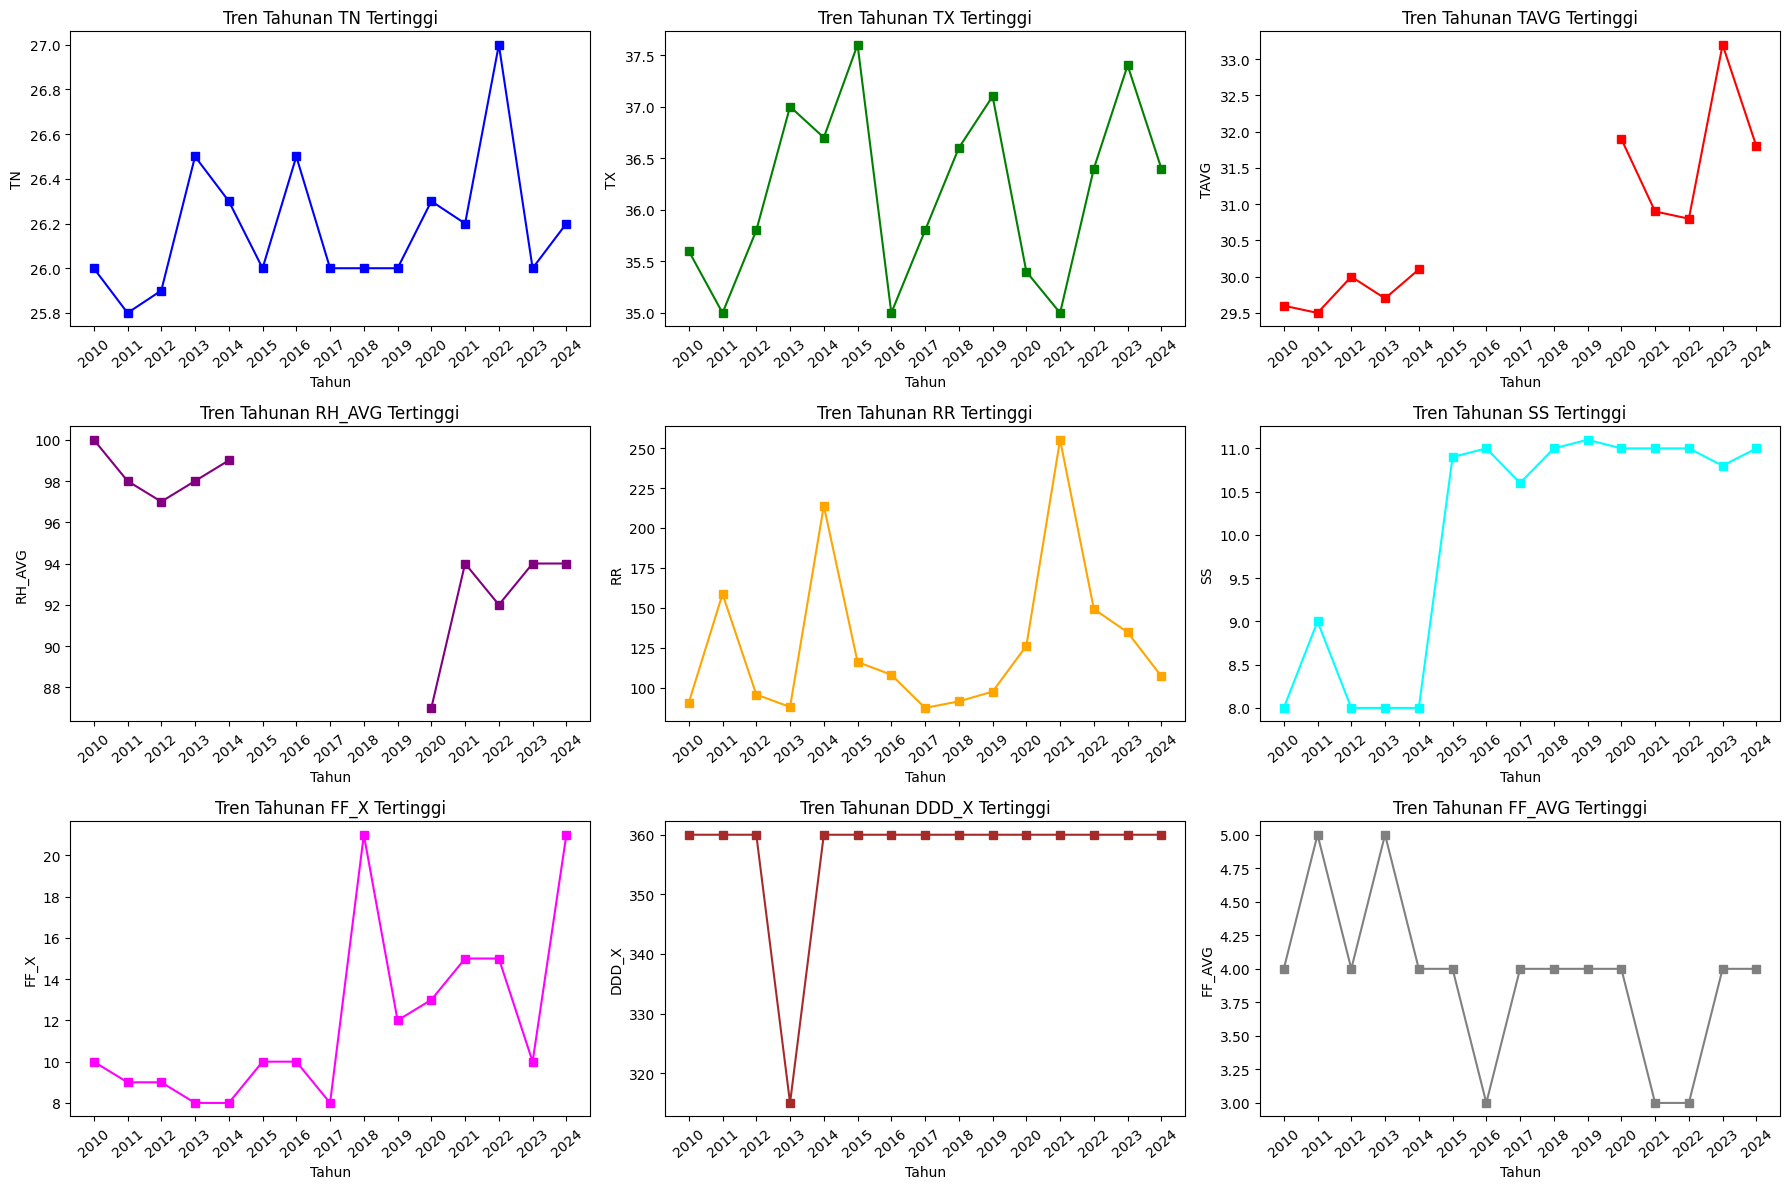

In [31]:
import matplotlib.pyplot as plt

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Tahun')[var].max().plot(ax=ax, marker='s', color=colors[i], legend=False)
    ax.set_ylabel(var)
    ax.set_xlabel('Tahun')
    ax.set_title(f'Tren Tahunan {var} Tertinggi')
    ax.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
    ax.set_xticklabels([str(t) for t in range(2010, 2025)], rotation=40)

if len(variables) < 9:
    for j in range(len(variables), 9):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

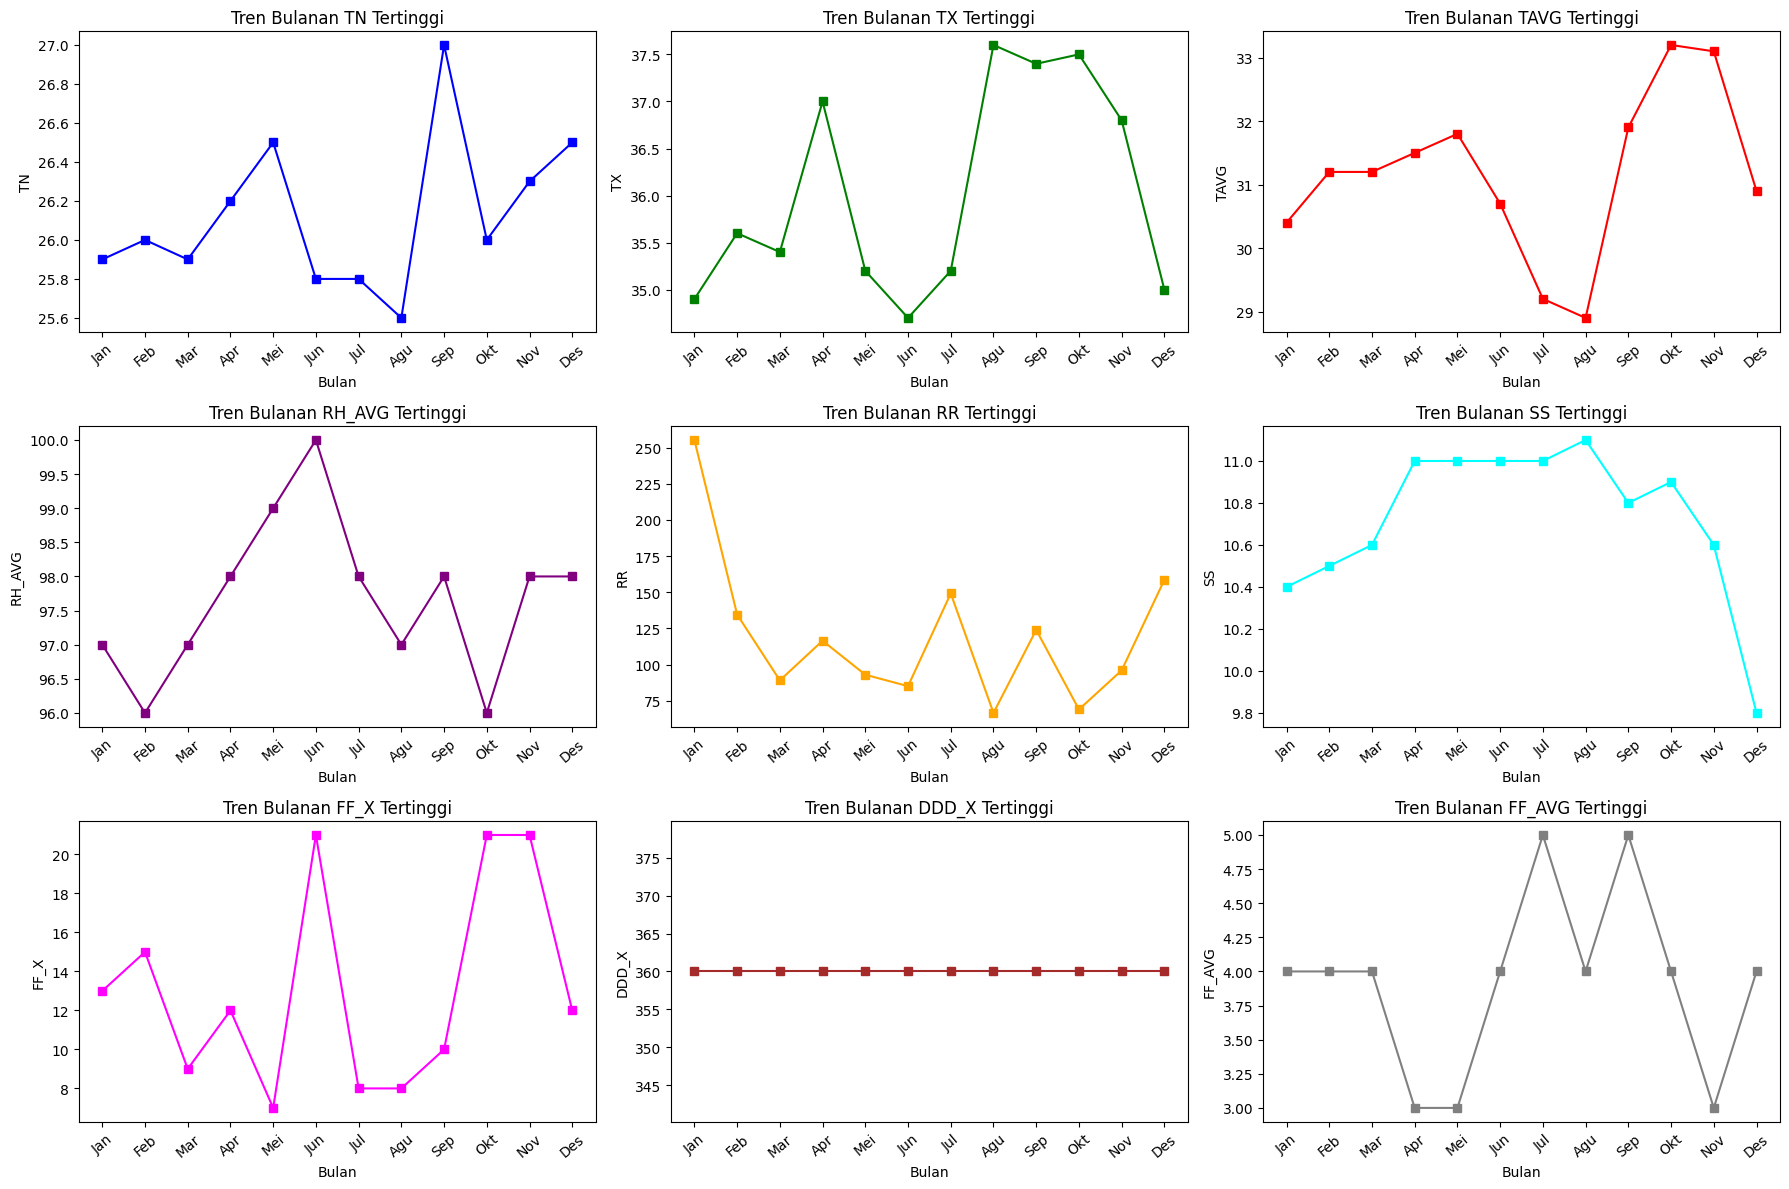

In [35]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Bulan'] = df_clean['TANGGAL'].dt.month

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Bulan')[var].max().plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Bulanan {var} Tertinggi')
    ax.set_xlabel('Bulan')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=40)

plt.tight_layout()
plt.show()

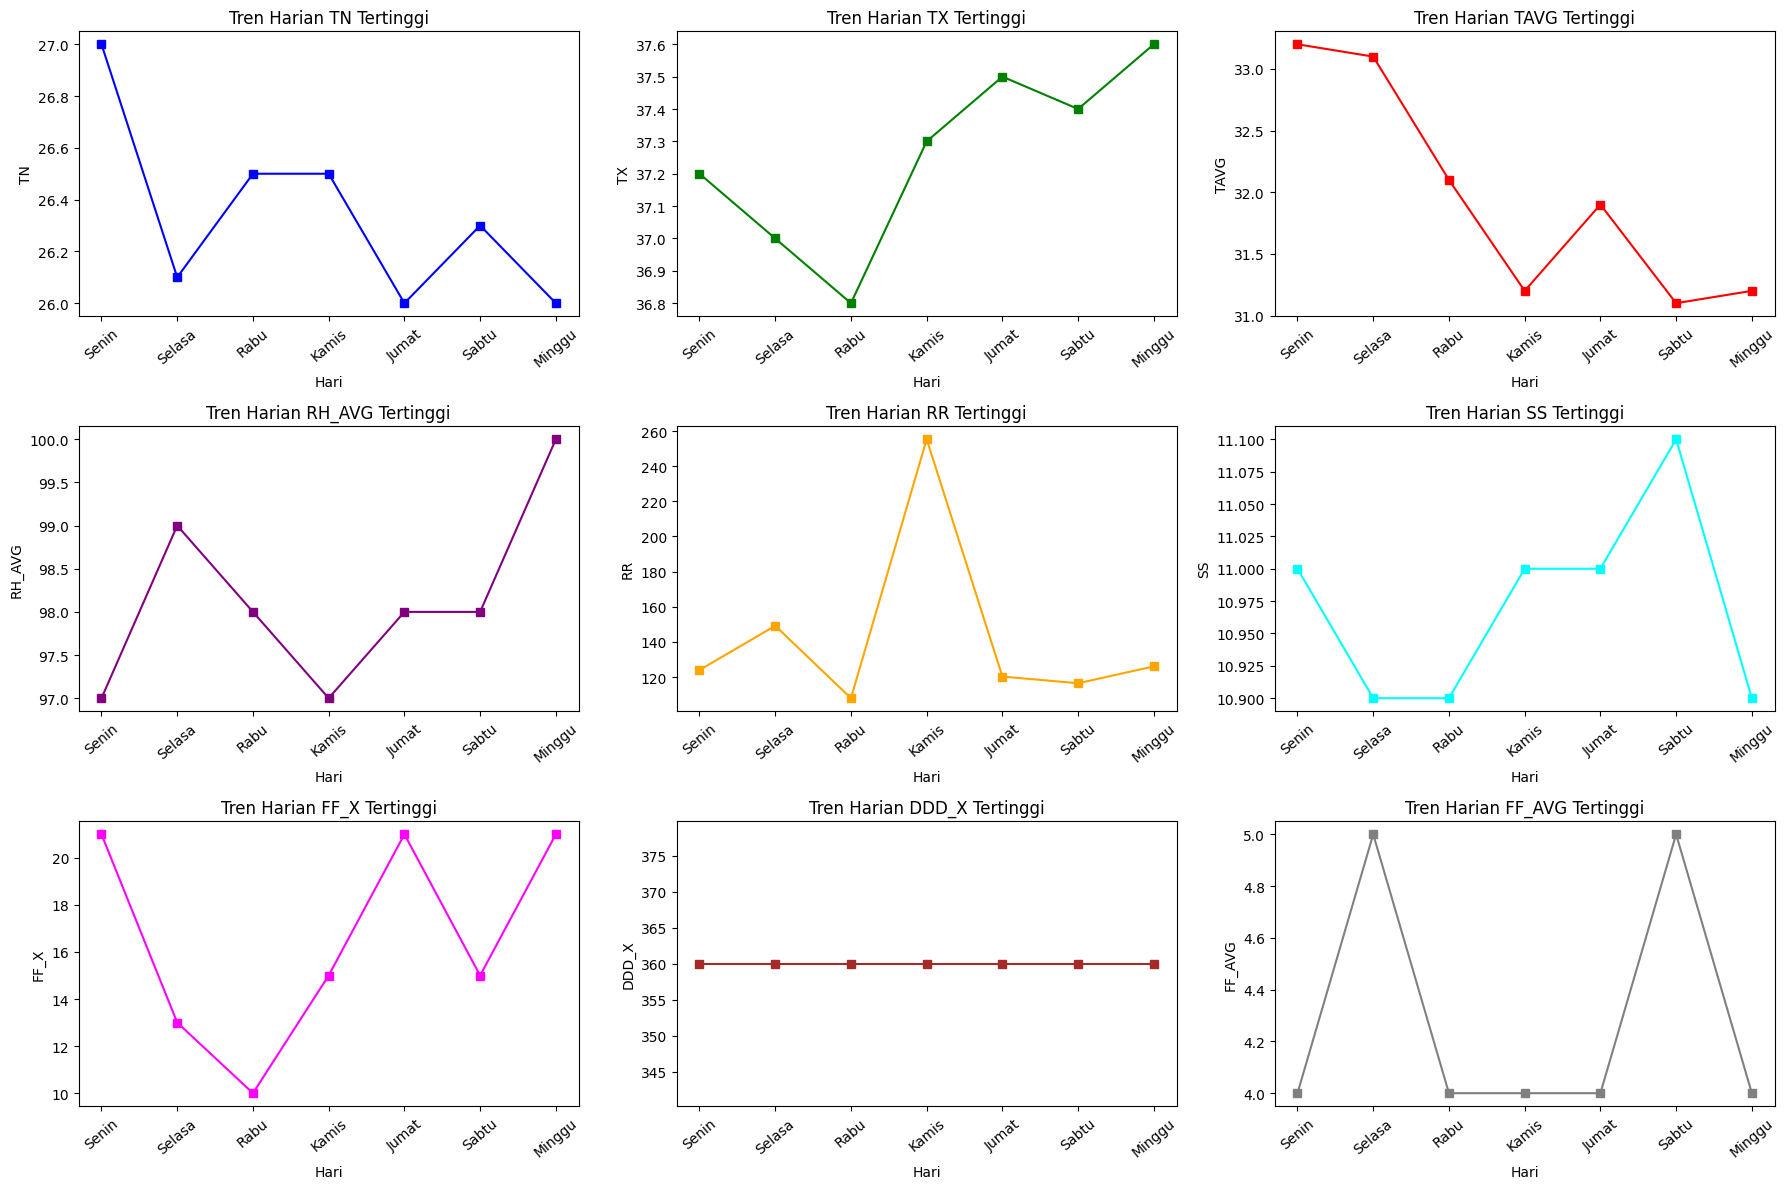

In [36]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Hari'] = df_clean['TANGGAL'].dt.day_name(locale='id_ID')
hari_urut = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
df_clean['Hari'] = pd.Categorical(df_clean['Hari'], categories=hari_urut, ordered=True)

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    data = df_clean.groupby('Hari', observed=False)[var].max().reindex(hari_urut)

    data.plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Harian {var} Tertinggi')
    ax.set_xlabel('Hari')
    ax.set_ylabel(var)
    ax.set_xticks(range(len(hari_urut)))
    ax.set_xticklabels(hari_urut, rotation=40)

plt.tight_layout()
plt.show()

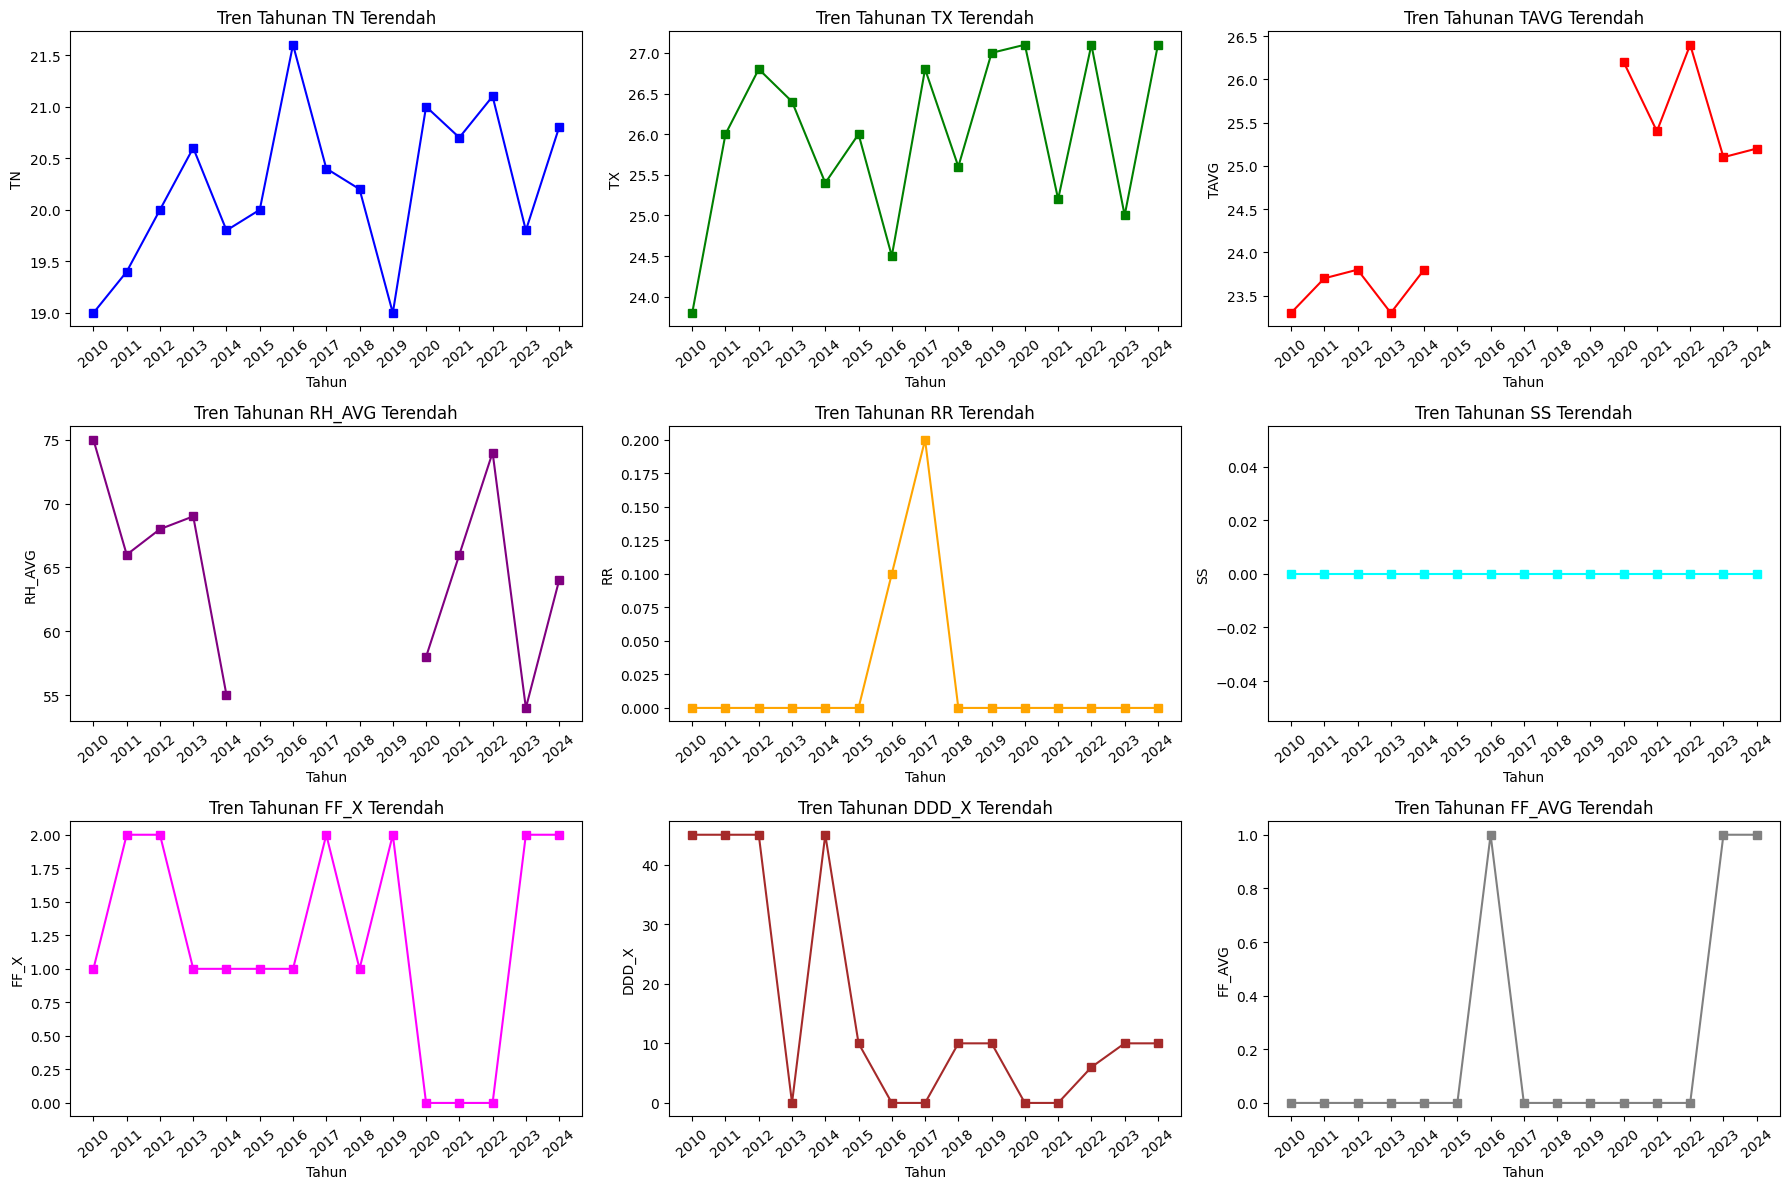

In [37]:
import matplotlib.pyplot as plt

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Tahun')[var].min().plot(ax=ax, marker='s', color=colors[i], legend=False)
    ax.set_ylabel(var)
    ax.set_xlabel('Tahun')
    ax.set_title(f'Tren Tahunan {var} Terendah')
    ax.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
    ax.set_xticklabels([str(t) for t in range(2010, 2025)], rotation=40)

if len(variables) < 9:
    for j in range(len(variables), 9):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

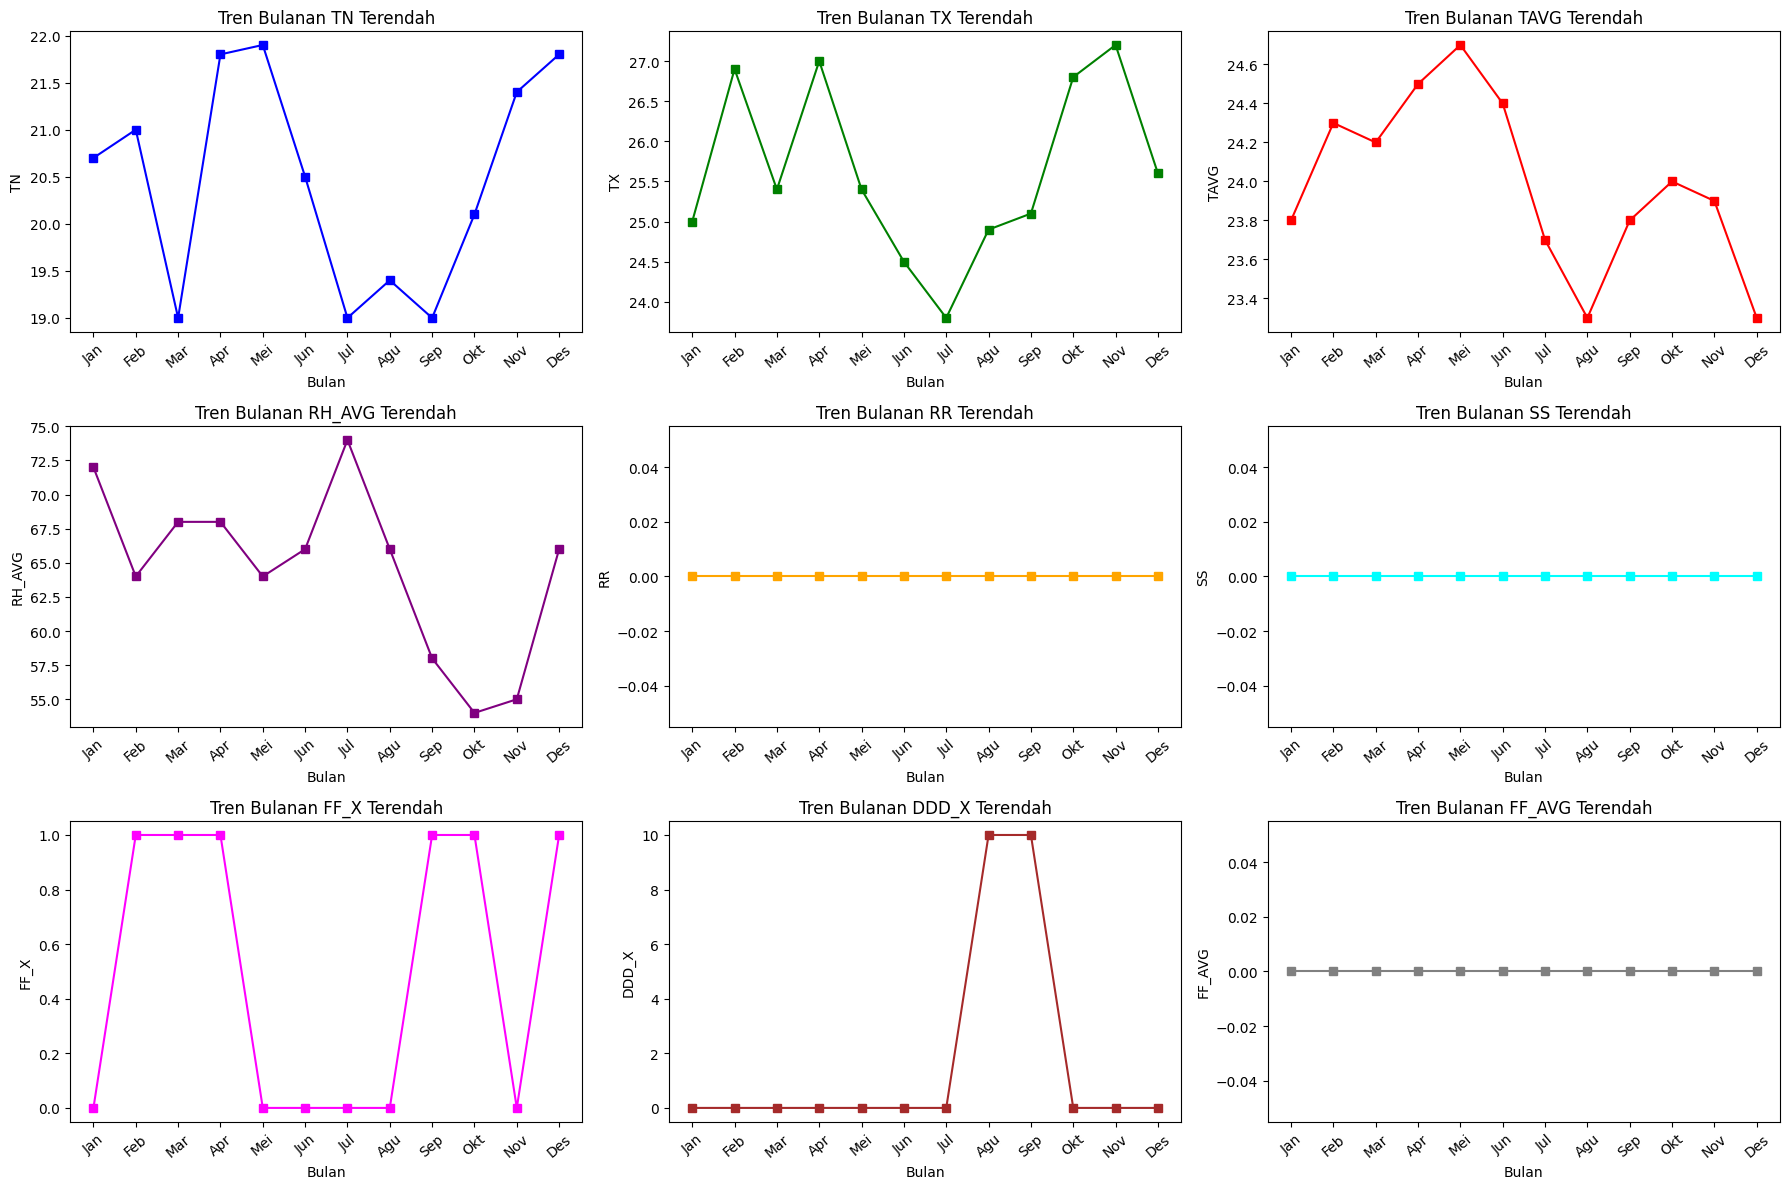

In [39]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Bulan'] = df_clean['TANGGAL'].dt.month

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Bulan')[var].min().plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Bulanan {var} Terendah')
    ax.set_xlabel('Bulan')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=40)

plt.tight_layout()
plt.show()

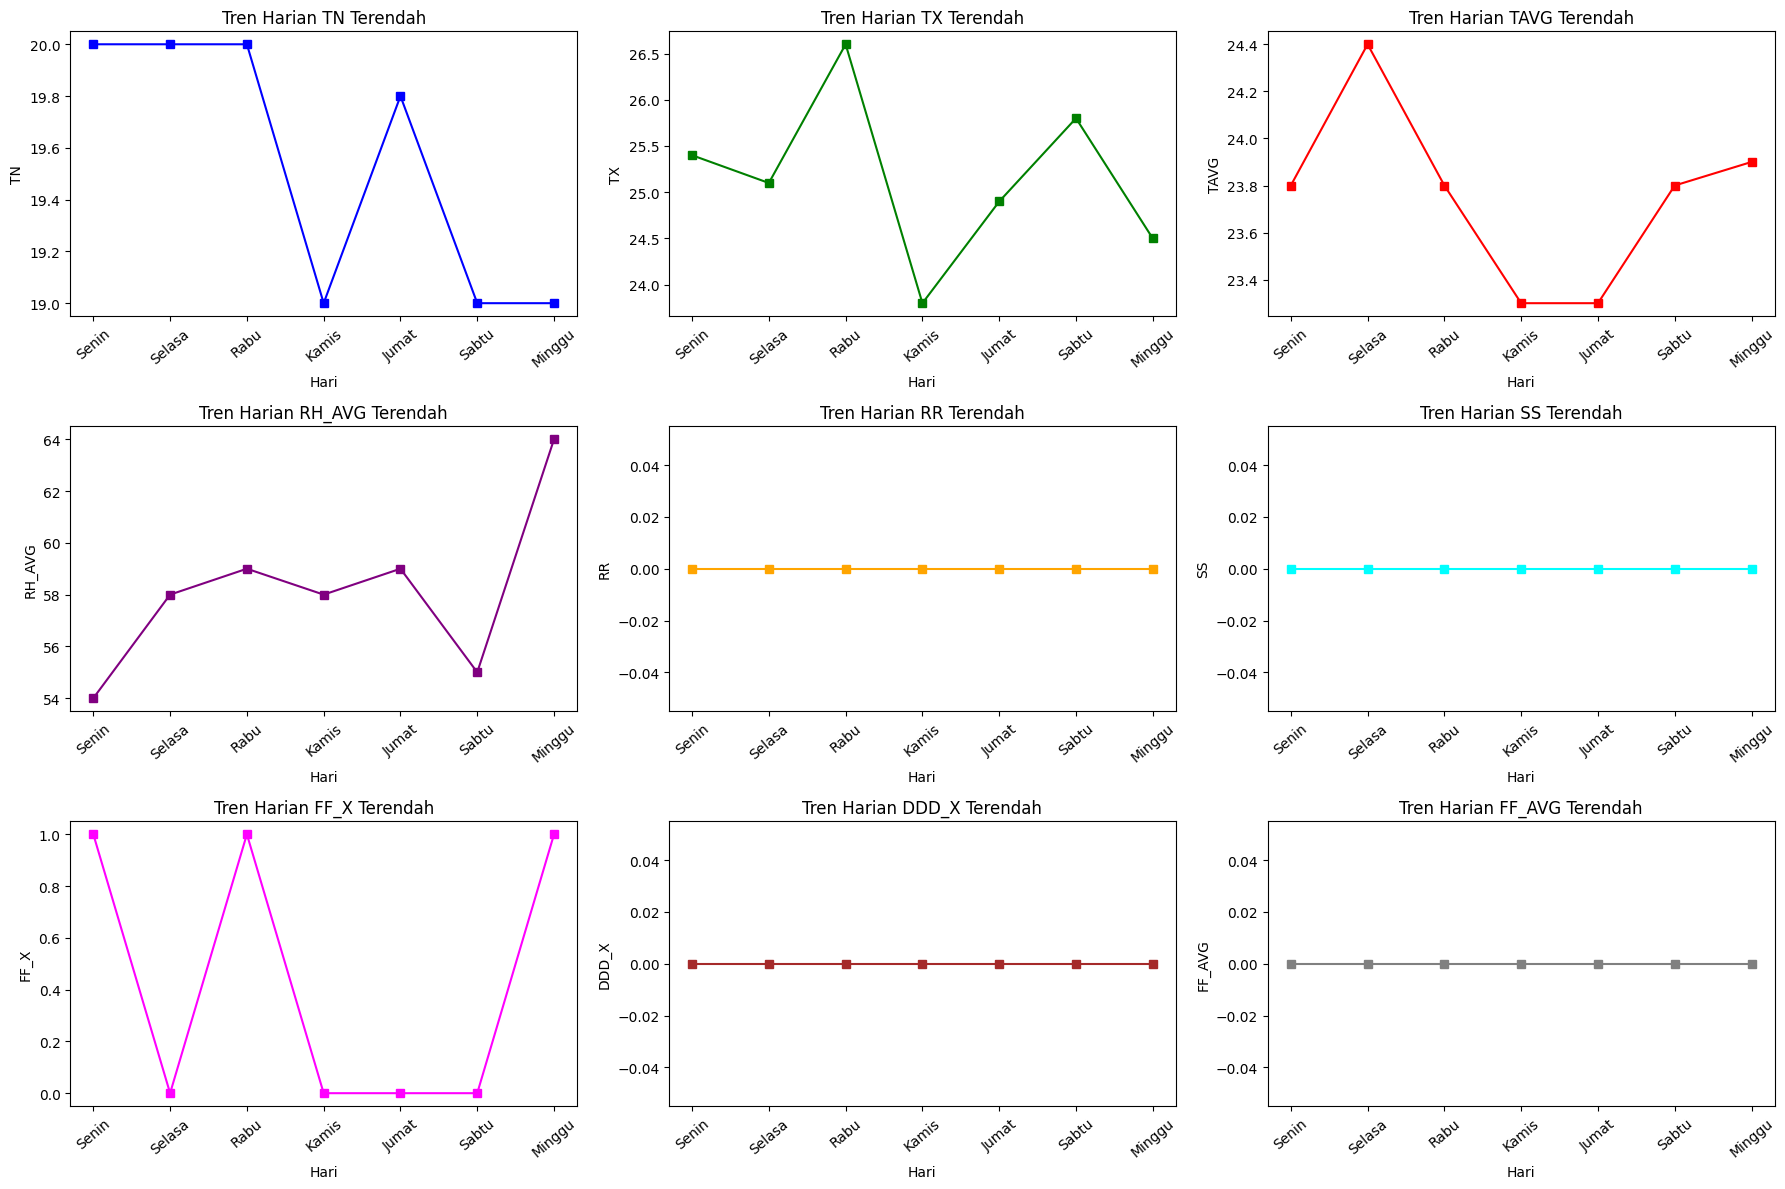

In [40]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Hari'] = df_clean['TANGGAL'].dt.day_name(locale='id_ID')
hari_urut = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
df_clean['Hari'] = pd.Categorical(df_clean['Hari'], categories=hari_urut, ordered=True)

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    data = df_clean.groupby('Hari', observed=False)[var].min().reindex(hari_urut)

    data.plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Harian {var} Terendah')
    ax.set_xlabel('Hari')
    ax.set_ylabel(var)
    ax.set_xticks(range(len(hari_urut)))
    ax.set_xticklabels(hari_urut, rotation=40)

plt.tight_layout()
plt.show()

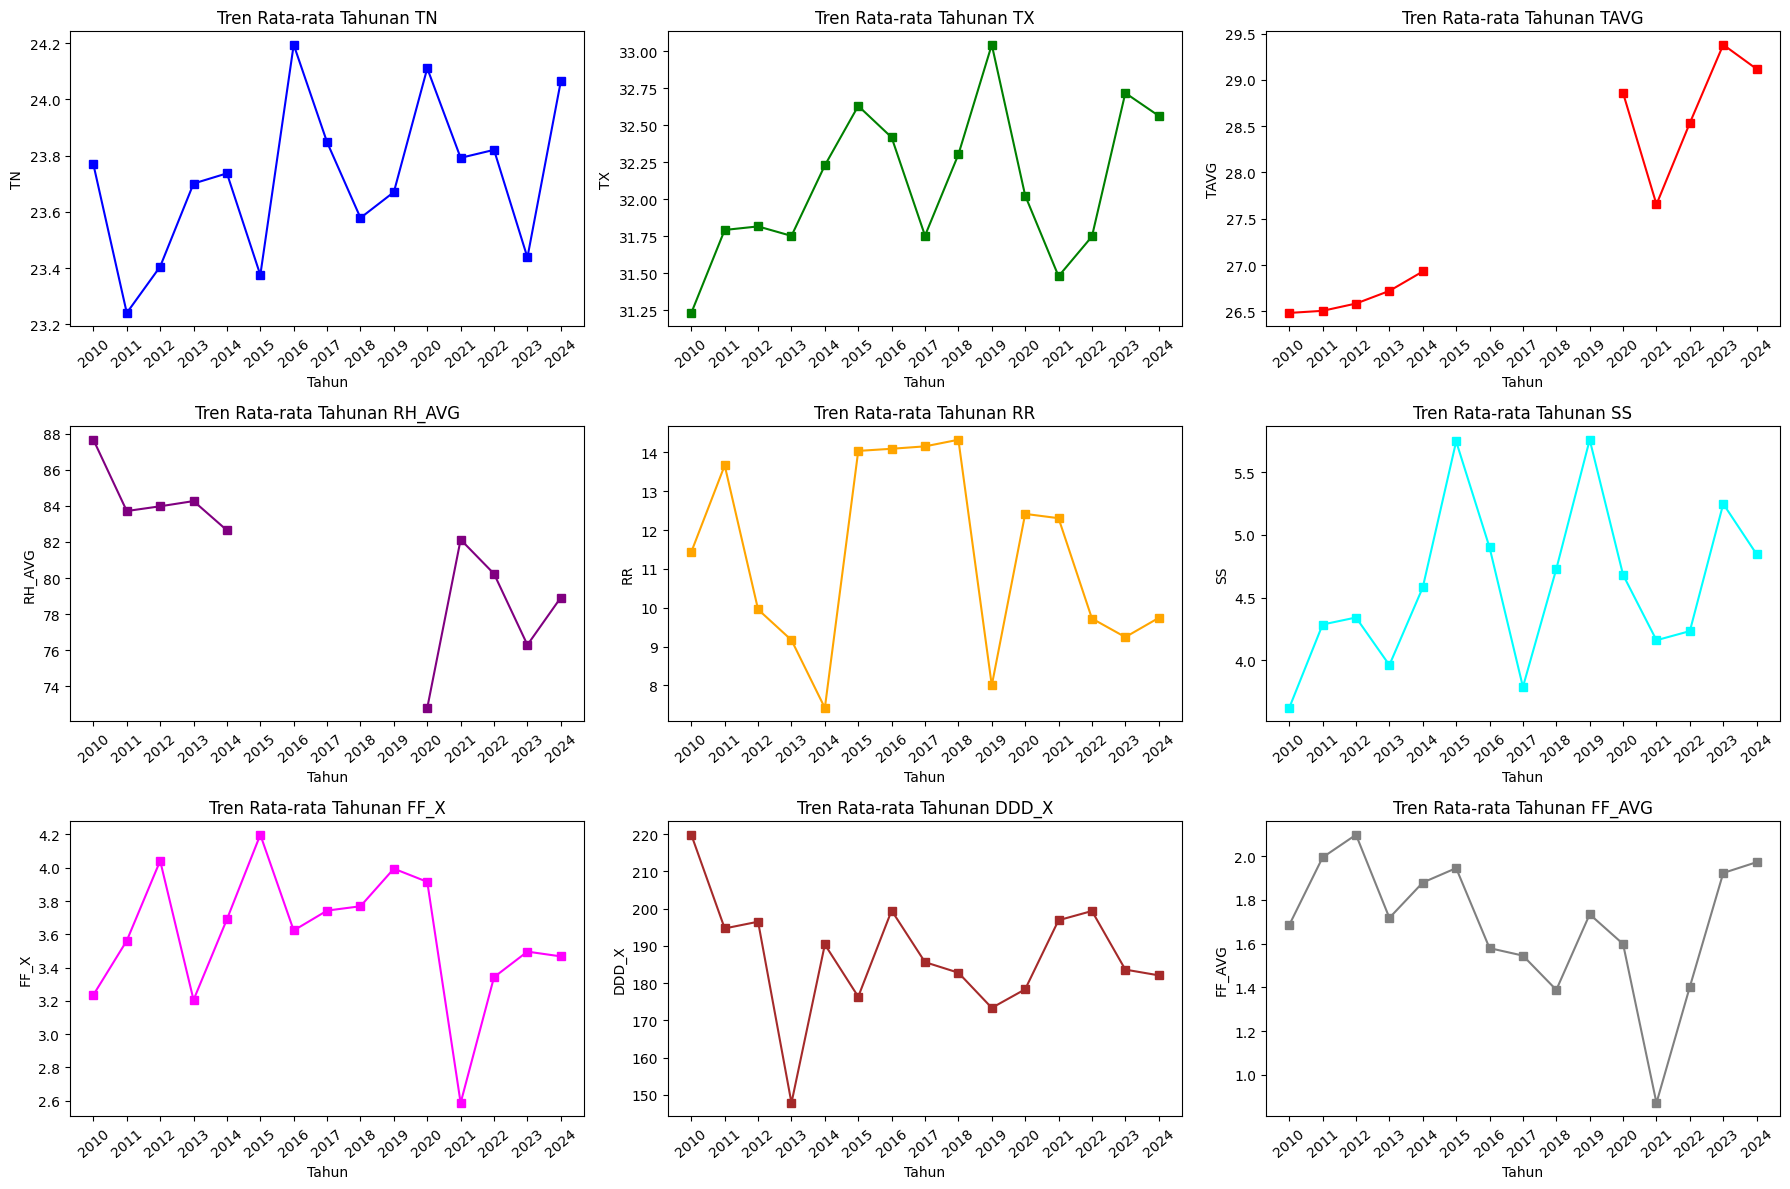

In [41]:
import matplotlib.pyplot as plt

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Tahun')[var].mean().plot(ax=ax, marker='s', color=colors[i], legend=False)
    ax.set_ylabel(var)
    ax.set_xlabel('Tahun')
    ax.set_title(f'Tren Rata-rata Tahunan {var}')
    ax.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
    ax.set_xticklabels([str(t) for t in range(2010, 2025)], rotation=40)

if len(variables) < 9:
    for j in range(len(variables), 9):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

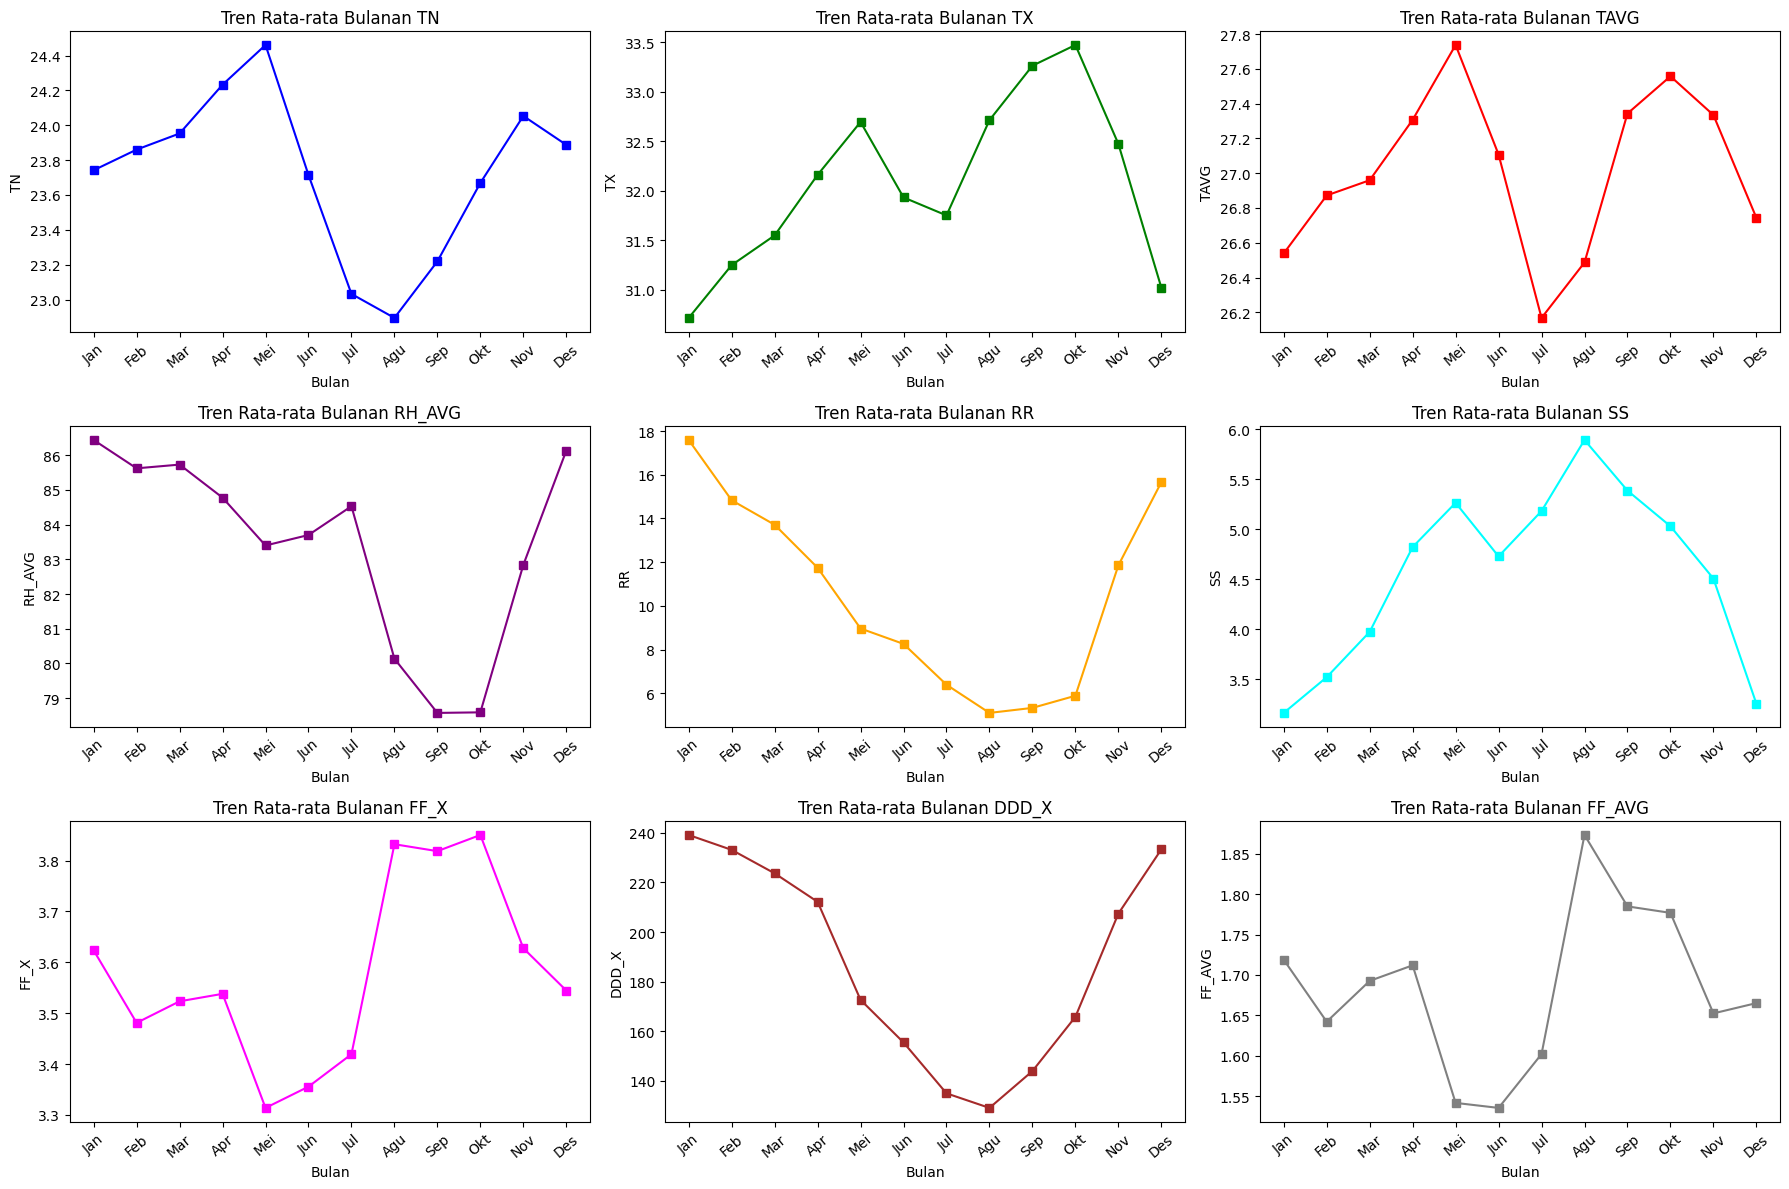

In [43]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Bulan'] = df_clean['TANGGAL'].dt.month

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    df_clean.groupby('Bulan')[var].mean().plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Rata-rata Bulanan {var}')
    ax.set_xlabel('Bulan')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=40)

plt.tight_layout()
plt.show()

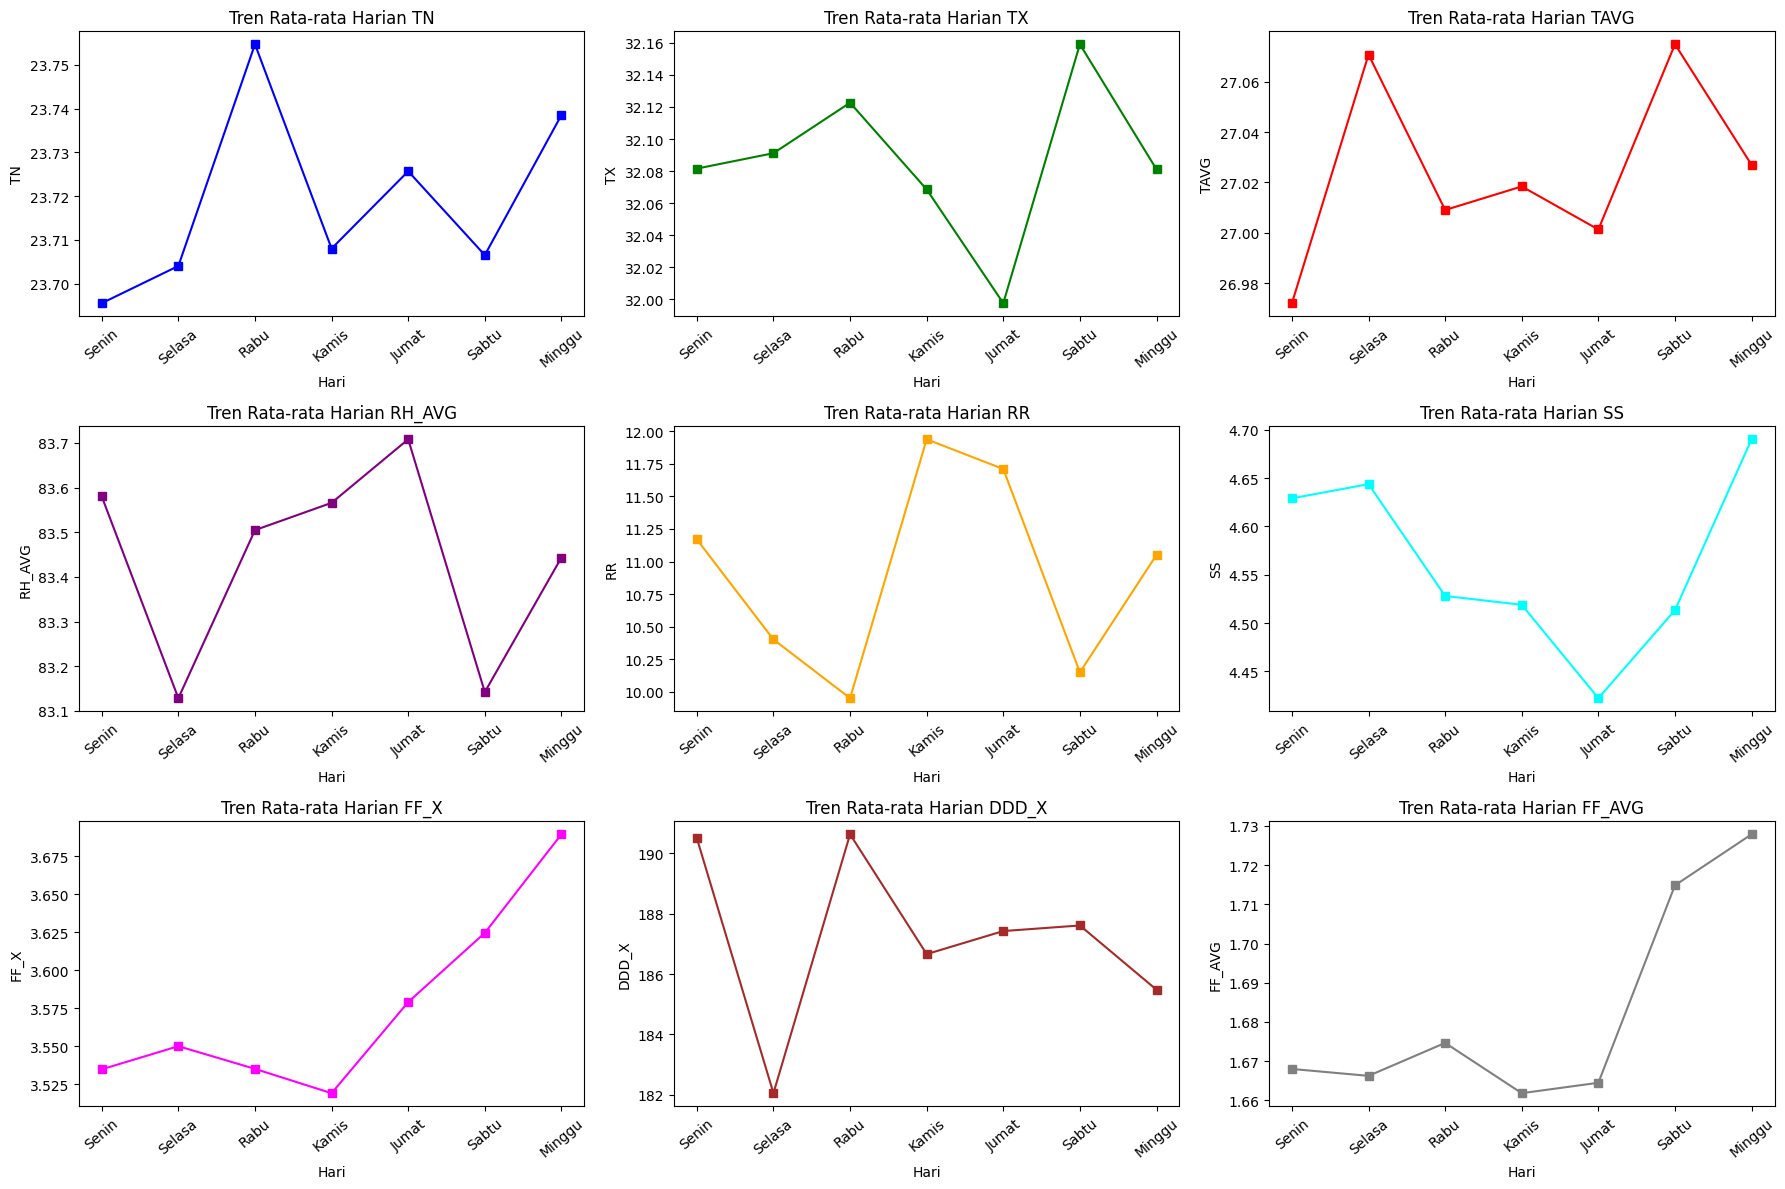

In [44]:
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
df_clean['Hari'] = df_clean['TANGGAL'].dt.day_name(locale='id_ID')
hari_urut = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
df_clean['Hari'] = pd.Categorical(df_clean['Hari'], categories=hari_urut, ordered=True)

variables = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    data = df_clean.groupby('Hari', observed=False)[var].mean().reindex(hari_urut)

    data.plot(ax=ax, marker='s', color=colors[i])
    ax.set_title(f'Tren Rata-rata Harian {var}')
    ax.set_xlabel('Hari')
    ax.set_ylabel(var)
    ax.set_xticks(range(len(hari_urut)))
    ax.set_xticklabels(hari_urut, rotation=40)

plt.tight_layout()
plt.show()

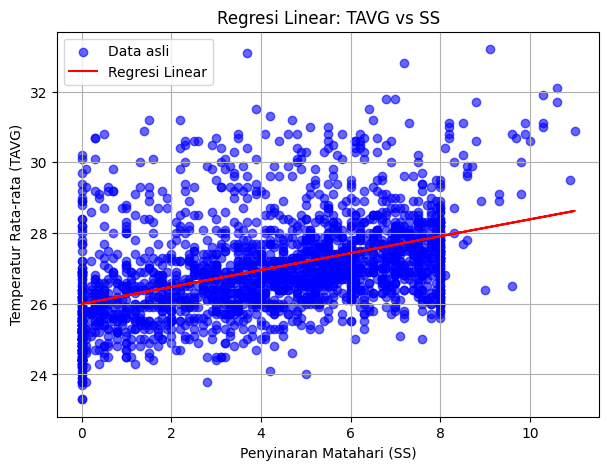

In [49]:
from sklearn.linear_model import LinearRegression
df_clean = df_clean.dropna(subset=['SS', 'TAVG'])

X = df_clean[['SS']]
y = df_clean['TAVG']
# Buat model
model = LinearRegression()
model.fit(X, y)

# Prediksi
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data asli')
plt.plot(X, y_pred, color='red', label='Regresi Linear')
plt.xlabel('Penyinaran Matahari (SS)')
plt.ylabel('Temperatur Rata-rata (TAVG)')
plt.title('Regresi Linear: TAVG vs SS')
plt.legend()
plt.grid(True)
plt.show()

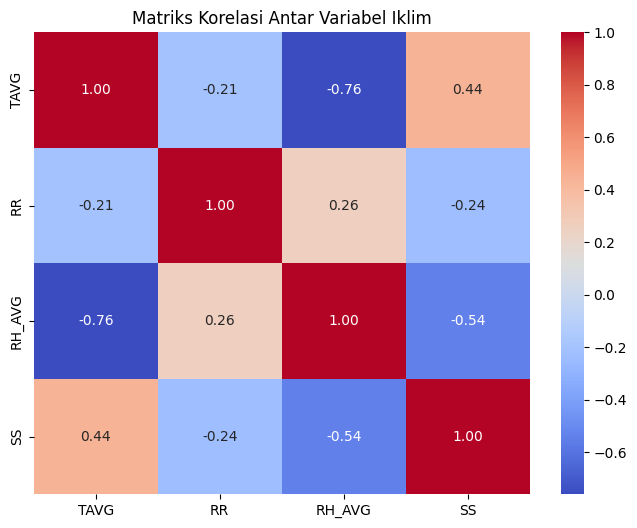

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih variabel utama
iklim_vars = df_clean[['TAVG', 'RR', 'RH_AVG', 'SS']]

# Hitung korelasi Pearson
corr_matrix = iklim_vars.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel Iklim')
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_10832\234186466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])
C:\Users\Michael\AppData\Local\Temp\ipykernel_10832\234186466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TAHUN'] = df_clean['TANGGAL'].dt.year


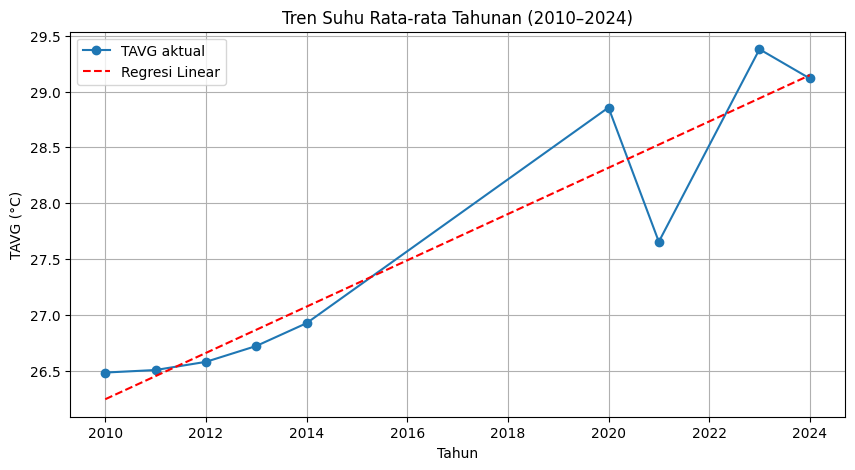

In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Pastikan kolom TANGGAL dalam datetime
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'])

# Ekstrak tahun
df_clean['TAHUN'] = df_clean['TANGGAL'].dt.year

# Hitung rata-rata tahunan TAVG
tahunan = df_clean.groupby('TAHUN')['TAVG'].mean().reset_index()

# Siapkan variabel regresi
X = tahunan[['TAHUN']]
y = tahunan['TAVG']

# Model regresi linear
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualisasi tren suhu tahunan
plt.figure(figsize=(10, 5))
plt.plot(tahunan['TAHUN'], y, marker='o', label='TAVG aktual')
plt.plot(tahunan['TAHUN'], y_pred, linestyle='--', color='red', label='Regresi Linear')
plt.title('Tren Suhu Rata-rata Tahunan (2010–2024)')
plt.xlabel('Tahun')
plt.ylabel('TAVG (°C)')
plt.legend()
plt.grid()
plt.show()